## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

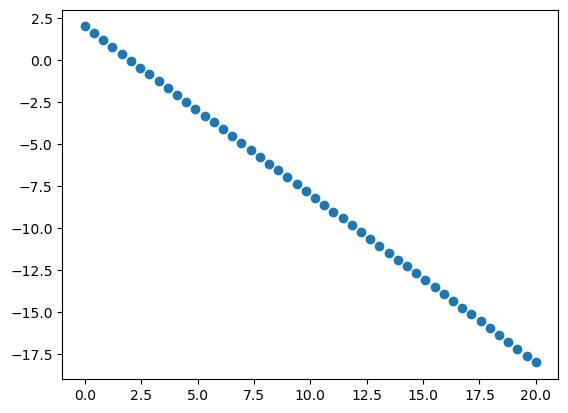

In [4]:
plt.scatter(X,y)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [5]:
def predict(X,theta):
    X = np.c_[np.ones(len(X)),X]
    predict = X@theta
    return predict

def update(learning_rate,d_theta,theta):
    theta = theta - (learning_rate)*(d_theta)
    return theta

def calc_error(h_theta,y,m):
    error = (h_theta-y)
    j = (error.T@error/(2*m))[0,0]
    return j, error

def calc_grad(X,error,m):
    d_theta = (X.T@error)/m
    grad_norm = np.linalg.norm(d_theta,2)
    return d_theta,grad_norm

def LinearReg(X,y,learning_rate=0.001,max_itration=1000,verbose=1):
    X = np.c_[np.ones(X.shape[0]),X]
    y = y.reshape(-1,1)
    m = X.shape[0]
    theta = np.zeros((X.shape[1],1))
    cost = []
    theta0_vec = []
    theta1_vec = []
    for i in range(max_itration):
        h_theta = X@theta

        j,error = calc_error(h_theta,y,m)
        cost.append(j)
        
        d_theta, grad_norm = calc_grad(X,error,m)
        
        
        if i>1 and ((cost[i-1] - cost[i]) or grad_norm)<0.001:
            print('\n***************** Training Report ***************')
            print(f'After {i} epochs')
            print('The optimum Thetas: ',theta.reshape(-1))
            print('The Cost function: ', j.reshape(-1))
            print('With Gradient Norm:',grad_norm)
            break
    
        theta0_vec.append(theta[0][0])
        theta1_vec.append(theta[1][0])
        theta = update(learning_rate,d_theta,theta)

        
        if i in range(0,10000,verbose):
            print('\n************************** itration ',i,'*************************\n')
            print('h(x)\n',h_theta.reshape(-1))
            print('Error Vec:\n',error.reshape(-1))
            print('\nCost = ',j.reshape(-1))
            print('Norm Gradient',grad_norm)
            print('thetas : ',theta.reshape(-1))
            plt.figure()
            plt.scatter(X[:,1],y)
            plt.plot(X[:,1],h_theta,color='r')
            plt.show()

    return theta,cost, theta0_vec, theta1_vec

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.


************************** itration  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vec:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost =  [49.34693878]
Norm Gradient 114.97254258164628
thetas :  [-0.004      -0.05734694]


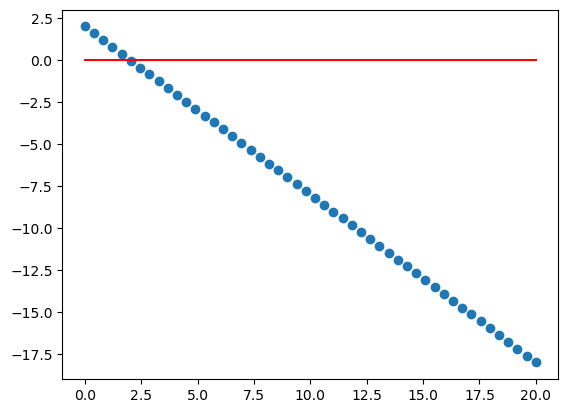


************************** itration  50 *************************

h(x)
 [ -0.04790955  -0.38346808  -0.71902661  -1.05458514  -1.39014368
  -1.72570221  -2.06126074  -2.39681927  -2.7323778   -3.06793633
  -3.40349486  -3.73905339  -4.07461192  -4.41017046  -4.74572899
  -5.08128752  -5.41684605  -5.75240458  -6.08796311  -6.42352164
  -6.75908017  -7.0946387   -7.43019724  -7.76575577  -8.1013143
  -8.43687283  -8.77243136  -9.10798989  -9.44354842  -9.77910695
 -10.11466548 -10.45022401 -10.78578255 -11.12134108 -11.45689961
 -11.79245814 -12.12801667 -12.4635752  -12.79913373 -13.13469226
 -13.47025079 -13.80580933 -14.14136786 -14.47692639 -14.81248492
 -15.14804345 -15.48360198 -15.81916051 -16.15471904 -16.49027757]
Error Vec:
 [-2.04790955 -1.97530482 -1.90270008 -1.83009535 -1.75749061 -1.68488588
 -1.61228115 -1.53967641 -1.46707168 -1.39446694 -1.32186221 -1.24925747
 -1.17665274 -1.10404801 -1.03144327 -0.95883854 -0.8862338  -0.81362907
 -0.74102434 -0.6684196  -0.5958148

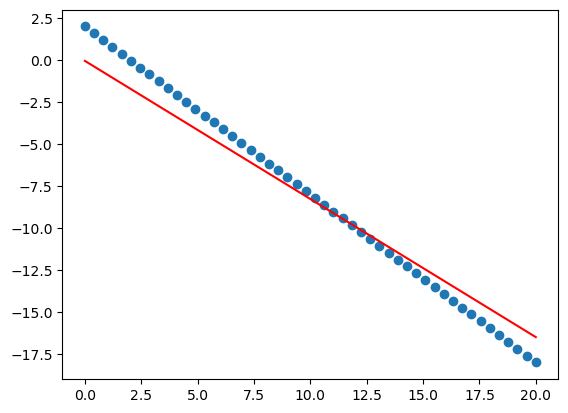

this is the last iteration  65  with the theta_0 :  [-0.04520484]  and theta_1 :  [-0.83894495]

The R-square value :  0.9686158031920962


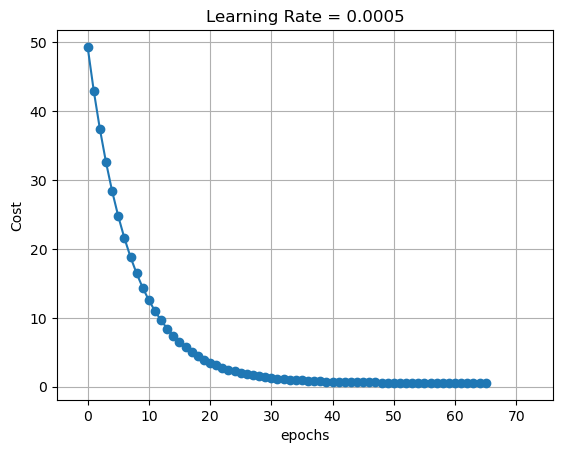

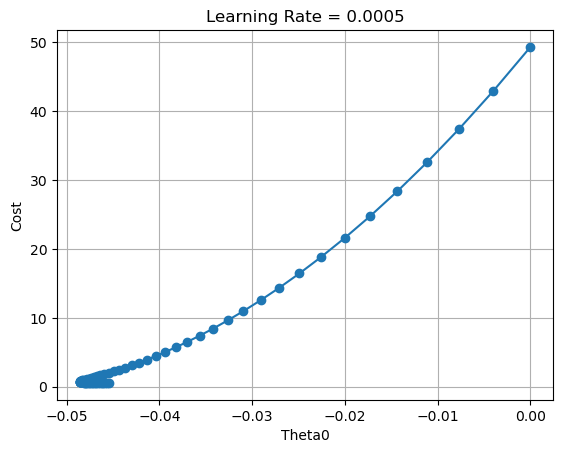

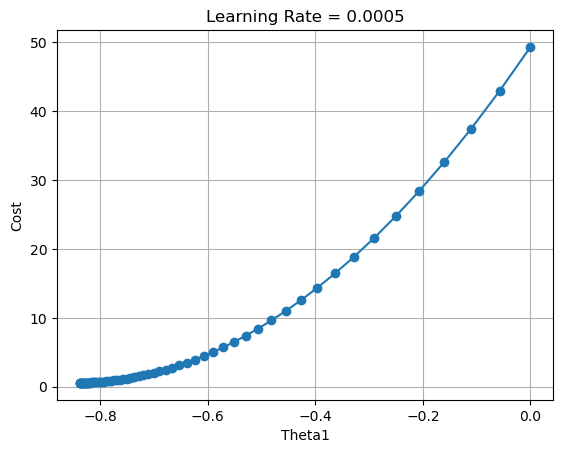

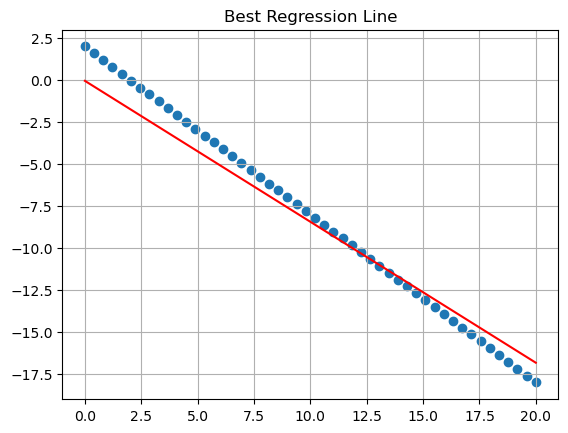

In [6]:
th, cost ,theta0_vec, theta1_vec = LinearReg(X,y,learning_rate=0.0005,max_itration=300,verbose=50)

y_predict = predict(X,th)
print('\nThe R-square value : ',r2_score(y,y_predict))

plt.plot(cost,'-o')
plt.xlim(-5,len(cost)+10)
plt.title('Learning Rate = 0.0005')
plt.xlabel('epochs')
plt.ylabel('Cost')
plt.grid()

plt.figure()
plt.plot(theta0_vec,cost[:len(theta0_vec)],'-o')
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta0')
plt.ylabel('Cost')
plt.grid()

plt.figure()
plt.plot(theta1_vec,cost[:len(theta1_vec)],'-o')
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta1')
plt.ylabel('Cost')
plt.grid()

plt.figure()
plt.scatter(X,y);
plt.plot(X,y_predict,color='r');
plt.title('Best Regression Line')
plt.grid()

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [7]:
def predict(X,theta):
    X = np.c_[np.ones(len(X)),X]
    predict = X@theta
    return predict

def update_Momentum(learning_rate,d_theta,theta,v,gamma):
    v = gamma*v +(learning_rate)*(d_theta)
    theta = theta - v
    return theta , v 

def calc_error(h_theta,y,m):
    error = (h_theta-y)
    j = (error.T@error/(2*m))[0,0]
    return j, error

def calc_grad(X,error,m):
    d_theta = (X.T@error)/m
    grad_norm = np.linalg.norm(d_theta,2)
    return d_theta,grad_norm

def LinearRegMomentum(X,y,learning_rate=0.001,max_itration=1000,verbose=1,gamma=0.1):
    X = np.c_[np.ones(X.shape[0]),X]
    y = y.reshape(-1,1)
    m = X.shape[0]
    theta = np.zeros((X.shape[1],1))
    v = np.zeros((X.shape[1],1))
    cost = []
    theta0_vec = []
    theta1_vec = []
    for i in range(max_itration):
        h_theta = X@theta

        j,error = calc_error(h_theta,y,m)
        cost.append(j)
        
        d_theta, grad_norm = calc_grad(X,error,m)
        
        
        if(grad_norm)<0.01:
            print('this is the last iteration ',i,' with the theta_0 : ',theta[0],' and theta_1 : ',theta[1])
            break
        if len(cost) > 1:
            if np.abs((cost[i-1] - cost[i]))<0.01:
                print('this is the last iteration ',i,' with the theta_0 : ',theta[0],' and theta_1 : ',theta[1])
                break
    
        theta0_vec.append(theta[0][0])
        theta1_vec.append(theta[1][0])
        theta,v = update_Momentum(learning_rate,d_theta,theta,v,gamma)

        
        if i in range(0,10000,verbose):
            print('\n************************** itration ',i,'*************************\n')
            print('h(x)\n',h_theta.reshape(-1))
            print('Error Vec:\n',error.reshape(-1))
            print('\nCost = ',j.reshape(-1))
            print('Norm Gradient',grad_norm)
            print('thetas : ',theta.reshape(-1))
            plt.figure()
            plt.scatter(X[:,1],y)
            plt.plot(X[:,1],h_theta,color='r')
            plt.show()

    return theta,cost, theta0_vec, theta1_vec

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.


************************** itration  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vec:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost =  [49.34693878]
Norm Gradient 114.97254258164628
thetas :  [-0.004      -0.05734694]


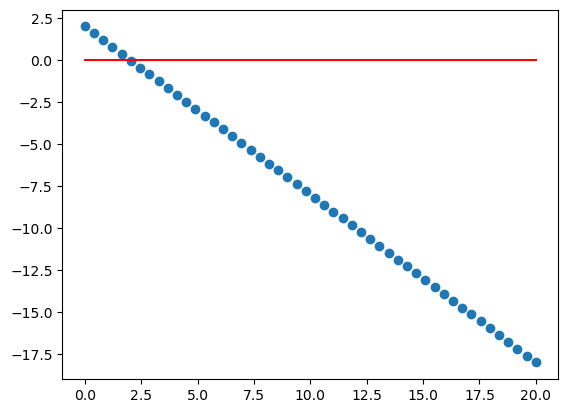

this is the last iteration  23  with the theta_0 :  [-0.05012923]  and theta_1 :  [-0.8307]

The R-square value :  0.9676613194676997


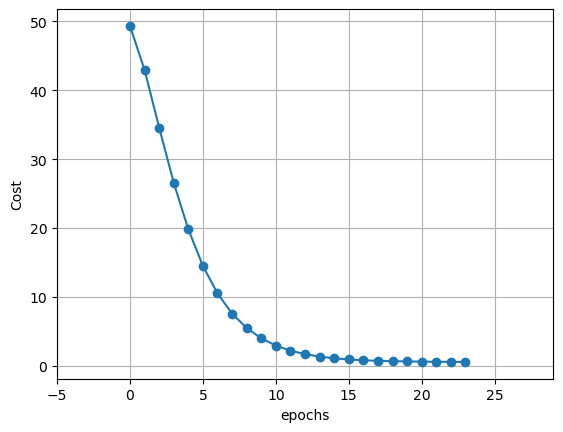

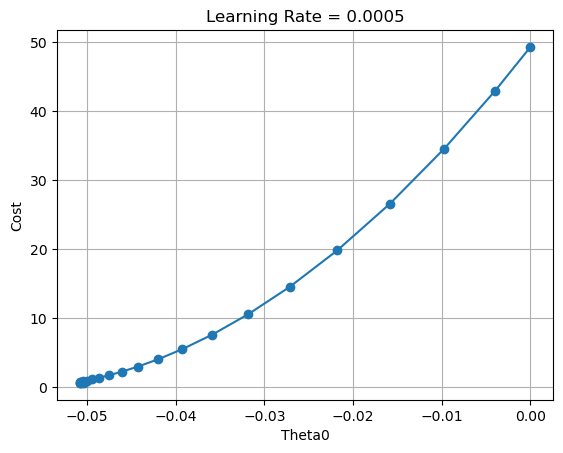

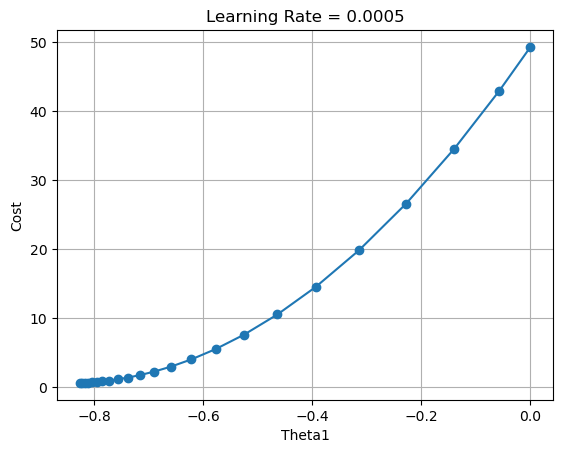

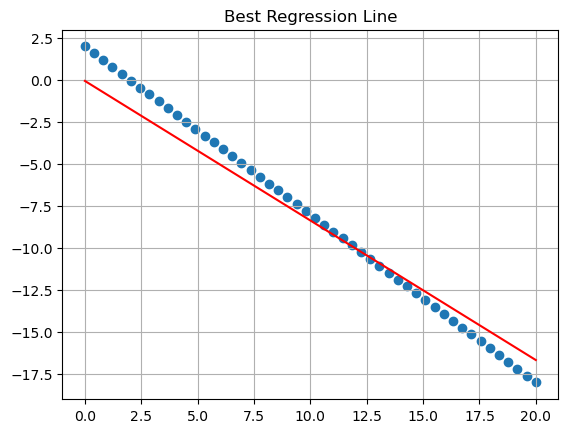

In [13]:
th, cost ,theta0_vec, theta1_vec = LinearRegMomentum(X,y,learning_rate=0.0005,max_itration=300,verbose=50,gamma=0.5)

y_predict = predict(X,th)
print('\nThe R-square value : ',r2_score(y,y_predict))

plt.plot(cost,'-o')
plt.xlim(-5,len(cost)+5)
plt.xlabel('epochs')
plt.ylabel('Cost')
plt.grid()

plt.figure()
plt.plot(theta0_vec,cost[:len(theta0_vec)],'-o')
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta0')
plt.ylabel('Cost')
plt.grid()

plt.figure()
plt.plot(theta1_vec,cost[:len(theta1_vec)],'-o')
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta1')
plt.ylabel('Cost')
plt.grid()

plt.figure()
plt.scatter(X,y);
plt.plot(X,y_predict,color='r');
plt.title('Best Regression Line')
plt.grid()

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.


************************** itration  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vec:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost =  [49.34693878]
Norm Gradient 114.97254258164628
thetas :  [-0.004      -0.05734694]


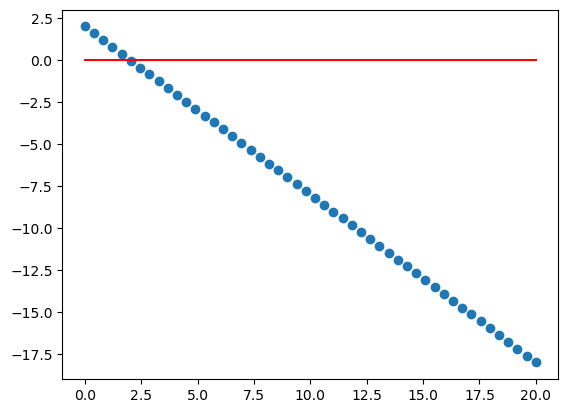

this is the last iteration  48  with the theta_0 :  [0.04351517]  and theta_1 :  [-0.78644177]

The R-square value :  0.9534683442194203




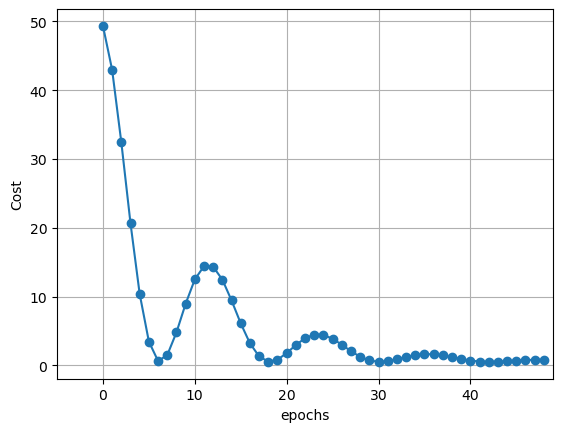

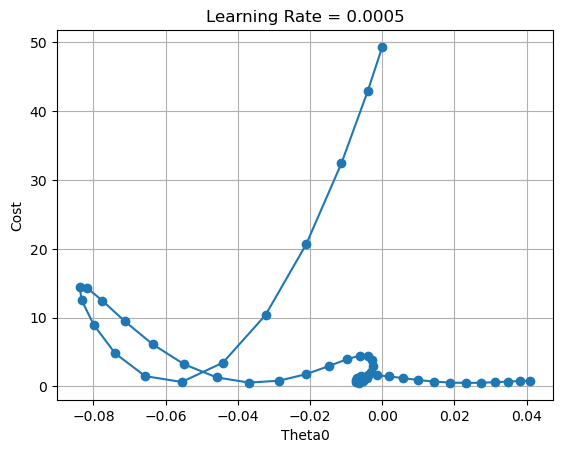

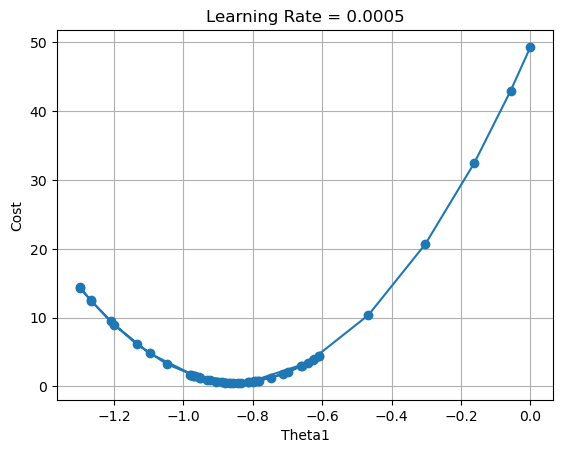

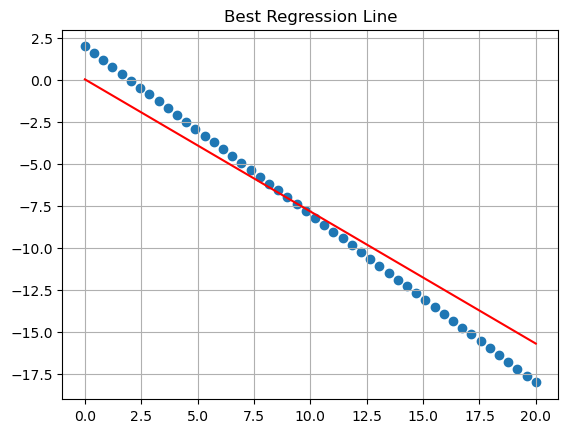

In [16]:
th, cost ,theta0_vec, theta1_vec = LinearRegMomentum(X,y,learning_rate=0.0005,max_itration=300,verbose=50,gamma=0.9)

y_predict = predict(X,th)
print('\nThe R-square value : ',r2_score(y,y_predict))
print('\n')
plt.plot(cost,'-o')
plt.xlim(-5,len(cost))
plt.xlabel('epochs')
plt.ylabel('Cost')
plt.grid()

plt.figure()
plt.plot(theta0_vec,cost[:len(theta0_vec)],'-o')
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta0')
plt.ylabel('Cost')
plt.grid()

plt.figure()
plt.plot(theta1_vec,cost[:len(theta1_vec)],'-o')
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta1')
plt.ylabel('Cost')
plt.grid()

plt.figure()
plt.scatter(X,y);
plt.plot(X,y_predict,color='r');
plt.title('Best Regression Line')
plt.grid()

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.


************************** itration  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vec:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost =  [49.34693878]
Norm Gradient 114.97254258164628
thetas :  [-0.004      -0.05734694]


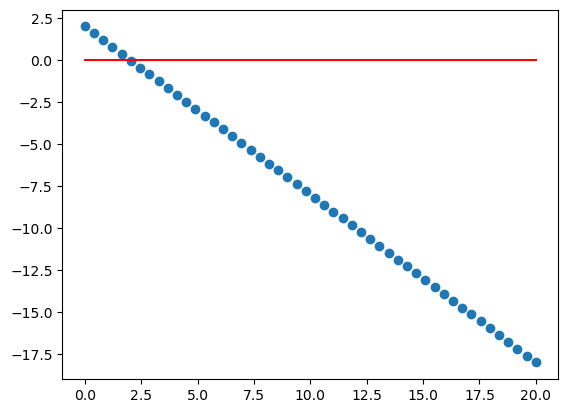

this is the last iteration  36  with the theta_0 :  [-0.00407947]  and theta_1 :  [-0.95555201]

The R-square value :  0.9279154375200596




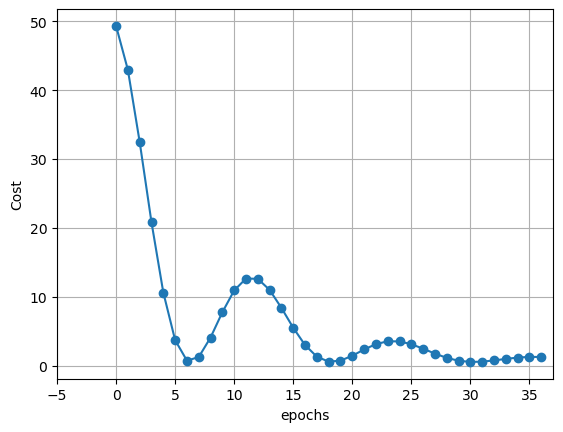

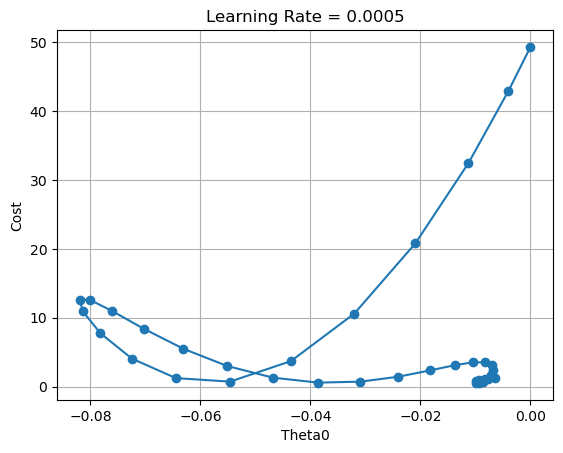

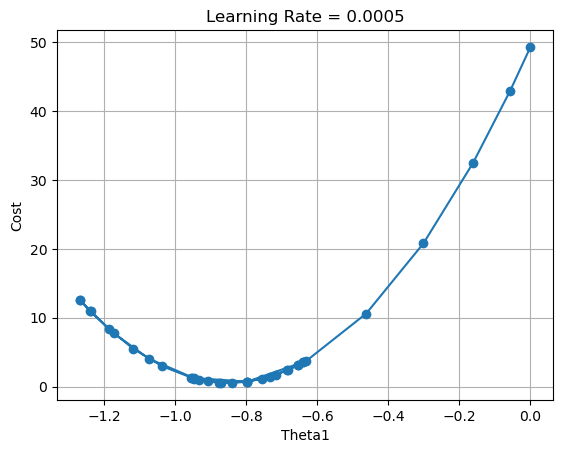

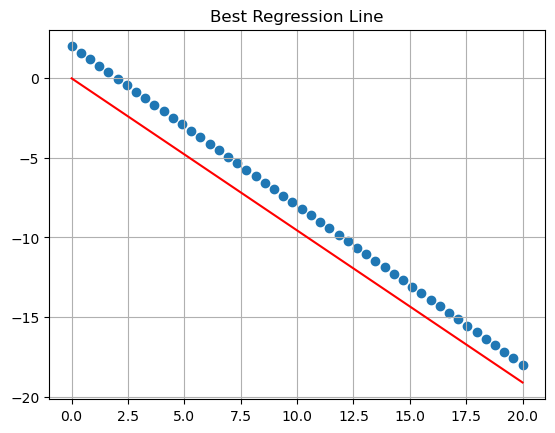

In [29]:
th, cost ,theta0_vec, theta1_vec = LinearRegMomentum(X,y,learning_rate=0.0005,max_itration=300,verbose=50,gamma=0.89)

y_predict = predict(X,th)
print('\nThe R-square value : ',r2_score(y,y_predict))
print('\n')
plt.plot(cost,'-o')
plt.xlim(-5,len(cost))
plt.xlabel('epochs')
plt.ylabel('Cost')
plt.grid()

plt.figure()
plt.plot(theta0_vec,cost[:len(theta0_vec)],'-o')
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta0')
plt.ylabel('Cost')
plt.grid()

plt.figure()
plt.plot(theta1_vec,cost[:len(theta1_vec)],'-o')
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta1')
plt.ylabel('Cost')
plt.grid()

plt.figure()
plt.scatter(X,y);
plt.plot(X,y_predict,color='r');
plt.title('Best Regression Line')
plt.grid()

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [8]:
def predict(X,theta):
    X = np.c_[np.ones(len(X)),X]
    predict = X@theta
    return predict

def update_NAG(learning_rate,d_theta,theta,v,gamma):
    theta_temp = theta - gamma*v
    v = gamma*v +(learning_rate)*(d_theta)
    theta = theta - v
    return theta , v ,theta_temp 

def calc_error(h_theta,y,m):
    error = (h_theta-y)
    j = (error.T@error/(2*m))[0,0]
    return j, error

def calc_grad(X,error,m):
    d_theta = (X.T@error)/m
    grad_norm = np.linalg.norm(d_theta,2)
    return d_theta,grad_norm

def LinearRegNAG(X,y,learning_rate=0.001,max_itration=1000,verbose=1,gamma=0.1):
    X = np.c_[np.ones(X.shape[0]),X]
    y = y.reshape(-1,1)
    m = X.shape[0]
    theta = np.zeros((X.shape[1],1))
    theta_temp = np.zeros((X.shape[1],1))
    v = np.zeros((X.shape[1],1))
    cost = []
    theta0_vec = []
    theta1_vec = []
    for i in range(max_itration):
        h_theta = X@theta
        h_theta_temp = X@theta_temp   # temp

        j,error = calc_error(h_theta,y,m)
        _,error_temp = calc_error(h_theta_temp,y,m) #temp
        cost.append(j)
        
        d_theta, grad_norm = calc_grad(X,error,m)
        d_theta_temp, _ = calc_grad(X,error_temp,m)  # temp
        
        
        if(grad_norm)<0.01:
            print('this is the last iteration ',i,' with the theta_0 : ',theta[0],' and theta_1 : ',theta[1])
            break
        if len(cost) > 1:
            if np.abs((cost[i-1] - cost[i]))<0.01:
                print('this is the last iteration ',i,' with the theta_0 : ',theta[0],' and theta_1 : ',theta[1])
                break
    
        theta0_vec.append(theta[0][0])
        theta1_vec.append(theta[1][0])
        theta,v,theta_temp = update_NAG(learning_rate,d_theta_temp,theta,v,gamma)

        
        if i in range(0,10000,verbose):
            print('\n************************** itration ',i,'*************************\n')
            print('h(x)\n',h_theta.reshape(-1))
            print('Error Vec:\n',error.reshape(-1))
            print('\nCost = ',j.reshape(-1))
            print('Norm Gradient',grad_norm)
            print('thetas : ',theta.reshape(-1))
            plt.figure()
            plt.scatter(X[:,1],y)
            plt.plot(X[:,1],h_theta,color='r')
            plt.show()

    return theta,cost, theta0_vec, theta1_vec

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.


************************** itration  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vec:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost =  [49.34693878]
Norm Gradient 114.97254258164628
thetas :  [-0.004      -0.05734694]


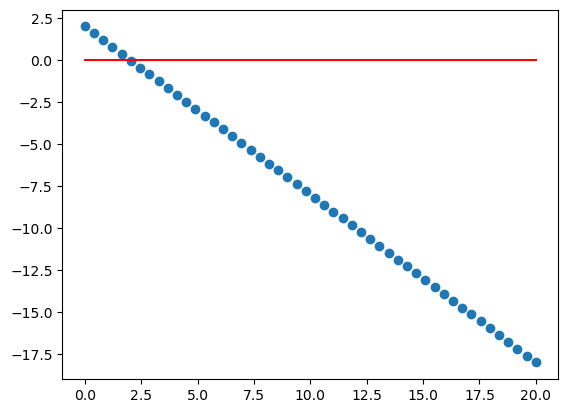


************************** itration  10 *************************

h(x)
 [ -0.08607095  -0.61863254  -1.15119414  -1.68375573  -2.21631732
  -2.74887891  -3.2814405   -3.8140021   -4.34656369  -4.87912528
  -5.41168687  -5.94424847  -6.47681006  -7.00937165  -7.54193324
  -8.07449483  -8.60705643  -9.13961802  -9.67217961 -10.2047412
 -10.7373028  -11.26986439 -11.80242598 -12.33498757 -12.86754917
 -13.40011076 -13.93267235 -14.46523394 -14.99779553 -15.53035713
 -16.06291872 -16.59548031 -17.1280419  -17.6606035  -18.19316509
 -18.72572668 -19.25828827 -19.79084987 -20.32341146 -20.85597305
 -21.38853464 -21.92109623 -22.45365783 -22.98621942 -23.51878101
 -24.0513426  -24.5839042  -25.11646579 -25.64902738 -26.18158897]
Error Vec:
 [-2.08607095 -2.21046928 -2.3348676  -2.45926593 -2.58366426 -2.70806259
 -2.83246091 -2.95685924 -3.08125757 -3.20565589 -3.33005422 -3.45445255
 -3.57885087 -3.7032492  -3.82764753 -3.95204586 -4.07644418 -4.20084251
 -4.32524084 -4.44963916 -4.5740374

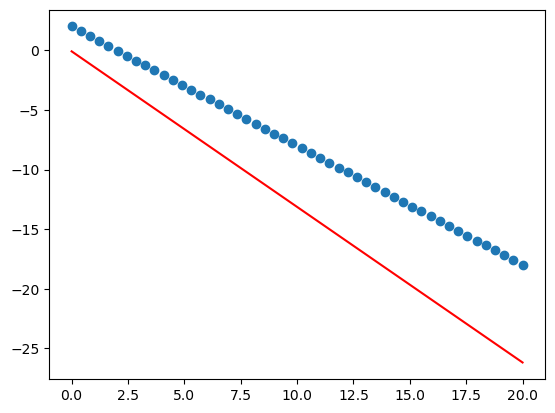


************************** itration  20 *************************

h(x)
 [ -0.01655776  -0.28305933  -0.5495609   -0.81606248  -1.08256405
  -1.34906562  -1.6155672   -1.88206877  -2.14857034  -2.41507192
  -2.68157349  -2.94807506  -3.21457664  -3.48107821  -3.74757978
  -4.01408136  -4.28058293  -4.5470845   -4.81358608  -5.08008765
  -5.34658922  -5.6130908   -5.87959237  -6.14609394  -6.41259552
  -6.67909709  -6.94559866  -7.21210024  -7.47860181  -7.74510338
  -8.01160496  -8.27810653  -8.5446081   -8.81110968  -9.07761125
  -9.34411282  -9.6106144   -9.87711597 -10.14361754 -10.41011912
 -10.67662069 -10.94312226 -11.20962384 -11.47612541 -11.74262698
 -12.00912856 -12.27563013 -12.5421317  -12.80863328 -13.07513485]
Error Vec:
 [-2.01655776 -1.87489606 -1.73323437 -1.59157268 -1.44991099 -1.3082493
 -1.1665876  -1.02492591 -0.88326422 -0.74160253 -0.59994084 -0.45827914
 -0.31661745 -0.17495576 -0.03329407  0.10836762  0.25002932  0.39169101
  0.5333527   0.67501439  0.8166760

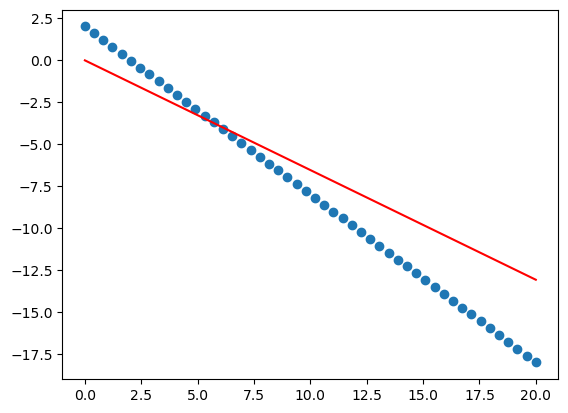


************************** itration  30 *************************

h(x)
 [-1.05552962e-02 -3.77749814e-01 -7.44944332e-01 -1.11213885e+00
 -1.47933337e+00 -1.84652789e+00 -2.21372240e+00 -2.58091692e+00
 -2.94811144e+00 -3.31530596e+00 -3.68250048e+00 -4.04969499e+00
 -4.41688951e+00 -4.78408403e+00 -5.15127855e+00 -5.51847307e+00
 -5.88566758e+00 -6.25286210e+00 -6.62005662e+00 -6.98725114e+00
 -7.35444566e+00 -7.72164017e+00 -8.08883469e+00 -8.45602921e+00
 -8.82322373e+00 -9.19041825e+00 -9.55761276e+00 -9.92480728e+00
 -1.02920018e+01 -1.06591963e+01 -1.10263908e+01 -1.13935854e+01
 -1.17607799e+01 -1.21279744e+01 -1.24951689e+01 -1.28623634e+01
 -1.32295579e+01 -1.35967525e+01 -1.39639470e+01 -1.43311415e+01
 -1.46983360e+01 -1.50655305e+01 -1.54327251e+01 -1.57999196e+01
 -1.61671141e+01 -1.65343086e+01 -1.69015031e+01 -1.72686976e+01
 -1.76358922e+01 -1.80030867e+01]
Error Vec:
 [-2.0105553  -1.96958655 -1.9286178  -1.88764905 -1.84668031 -1.80571156
 -1.76474281 -1.72377407 -1

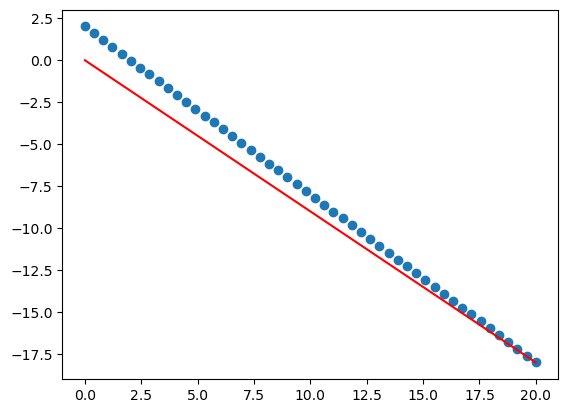


************************** itration  40 *************************

h(x)
 [ 1.69105386e-02 -3.38452829e-01 -6.93816197e-01 -1.04917957e+00
 -1.40454293e+00 -1.75990630e+00 -2.11526967e+00 -2.47063304e+00
 -2.82599641e+00 -3.18135977e+00 -3.53672314e+00 -3.89208651e+00
 -4.24744988e+00 -4.60281325e+00 -4.95817661e+00 -5.31353998e+00
 -5.66890335e+00 -6.02426672e+00 -6.37963009e+00 -6.73499345e+00
 -7.09035682e+00 -7.44572019e+00 -7.80108356e+00 -8.15644693e+00
 -8.51181029e+00 -8.86717366e+00 -9.22253703e+00 -9.57790040e+00
 -9.93326377e+00 -1.02886271e+01 -1.06439905e+01 -1.09993539e+01
 -1.13547172e+01 -1.17100806e+01 -1.20654440e+01 -1.24208073e+01
 -1.27761707e+01 -1.31315341e+01 -1.34868974e+01 -1.38422608e+01
 -1.41976242e+01 -1.45529875e+01 -1.49083509e+01 -1.52637143e+01
 -1.56190777e+01 -1.59744410e+01 -1.63298044e+01 -1.66851678e+01
 -1.70405311e+01 -1.73958945e+01]
Error Vec:
 [-1.98308946 -1.93028956 -1.87748967 -1.82468977 -1.77188987 -1.71908997
 -1.66629008 -1.61349018 -1

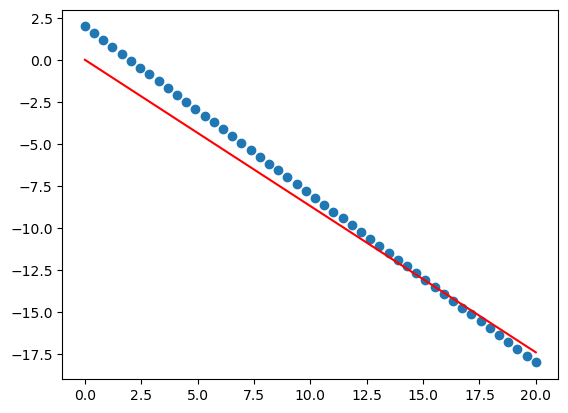


************************** itration  50 *************************

h(x)
 [  0.04638421  -0.28680395  -0.6199921   -0.95318026  -1.28636841
  -1.61955657  -1.95274472  -2.28593288  -2.61912103  -2.95230919
  -3.28549734  -3.6186855   -3.95187365  -4.28506181  -4.61824996
  -4.95143812  -5.28462627  -5.61781443  -5.95100258  -6.28419074
  -6.61737889  -6.95056705  -7.2837552   -7.61694336  -7.95013151
  -8.28331967  -8.61650782  -8.94969598  -9.28288413  -9.61607229
  -9.94926044 -10.2824486  -10.61563675 -10.94882491 -11.28201306
 -11.61520122 -11.94838937 -12.28157753 -12.61476568 -12.94795384
 -13.28114199 -13.61433015 -13.9475183  -14.28070646 -14.61389461
 -14.94708277 -15.28027092 -15.61345908 -15.94664723 -16.27983539]
Error Vec:
 [-1.95361579 -1.87864068 -1.80366557 -1.72869046 -1.65371535 -1.57874024
 -1.50376513 -1.42879002 -1.35381491 -1.2788398  -1.20386469 -1.12888958
 -1.05391447 -0.97893936 -0.90396425 -0.82898914 -0.75401403 -0.67903892
 -0.60406381 -0.5290887  -0.454113

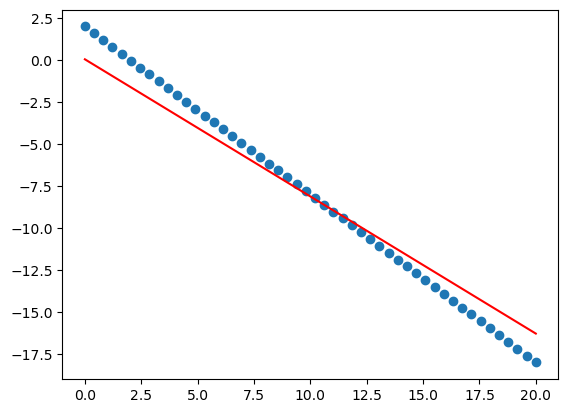

this is the last iteration  58  with the theta_0 :  [0.06014694]  and theta_1 :  [-0.90326069]

The R-square value :  0.9633837157380568


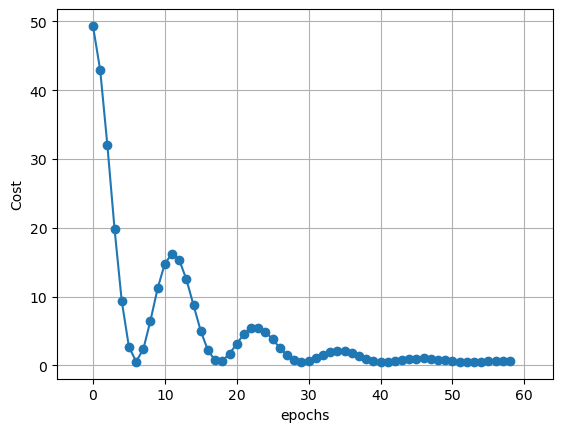

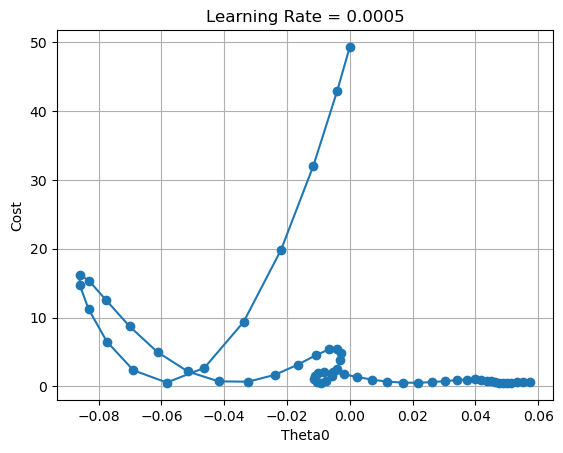

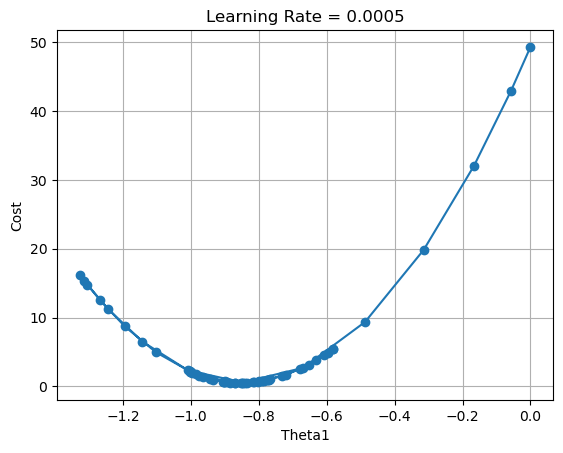

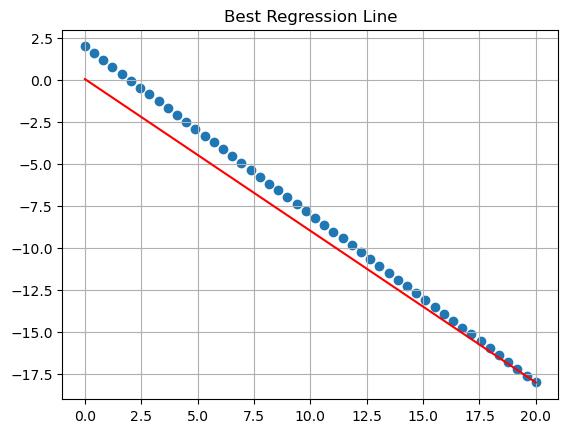

In [11]:
th, cost ,theta0_vec, theta1_vec = LinearRegNAG(X,y,learning_rate=0.0005,max_itration=300,verbose=10,gamma=0.9)

y_predict = predict(X,th)
print('\nThe R-square value : ',r2_score(y,y_predict))

plt.plot(cost,'-o')
plt.xlim(-5,len(cost)+5)
plt.xlabel('epochs')
plt.ylabel('Cost')
plt.grid()

plt.figure()
plt.plot(theta0_vec,cost[:len(theta0_vec)],'-o')
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta0')
plt.ylabel('Cost')
plt.grid()

plt.figure()
plt.plot(theta1_vec,cost[:len(theta1_vec)],'-o')
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta1')
plt.ylabel('Cost')
plt.grid()

plt.figure()
plt.scatter(X,y);
plt.plot(X,y_predict,color='r');
plt.title('Best Regression Line')
plt.grid()

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.


************************** itration  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vec:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost =  [49.34693878]
Norm Gradient 114.97254258164628
thetas :  [-0.004      -0.05734694]


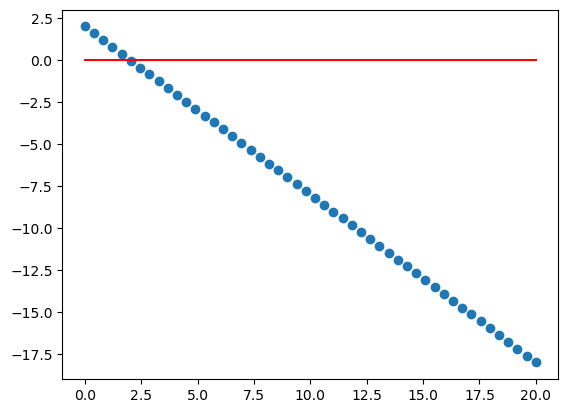

this is the last iteration  46  with the theta_0 :  [0.03172595]  and theta_1 :  [-0.78704923]

The R-square value :  0.9539026640995434


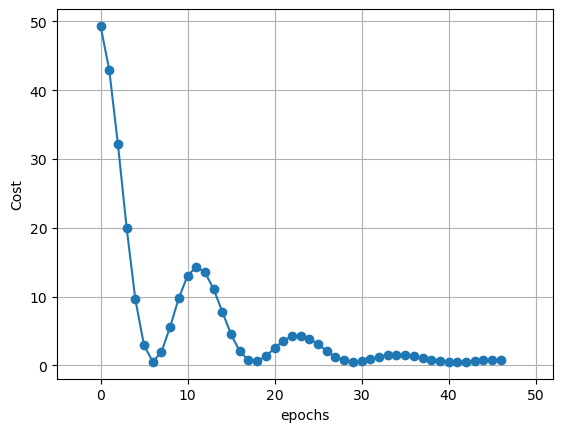

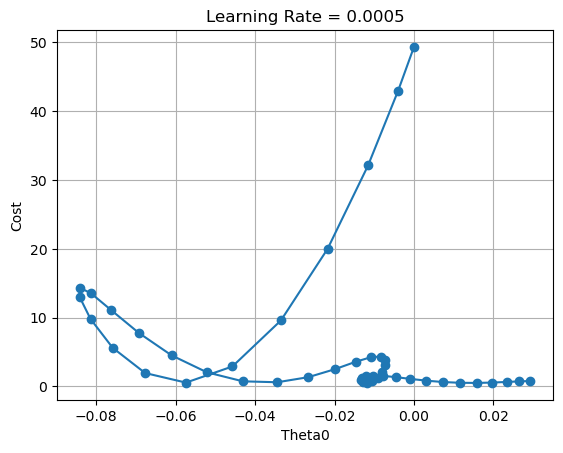

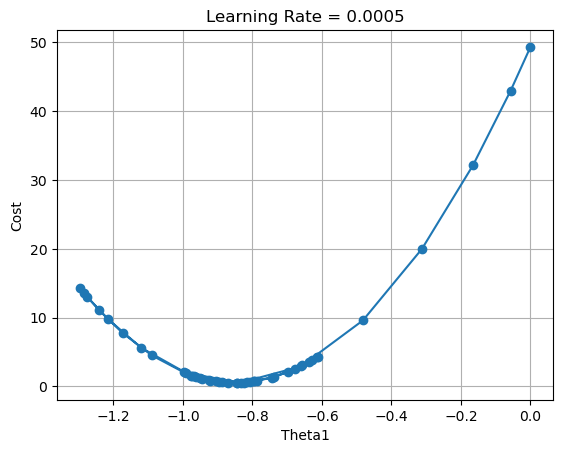

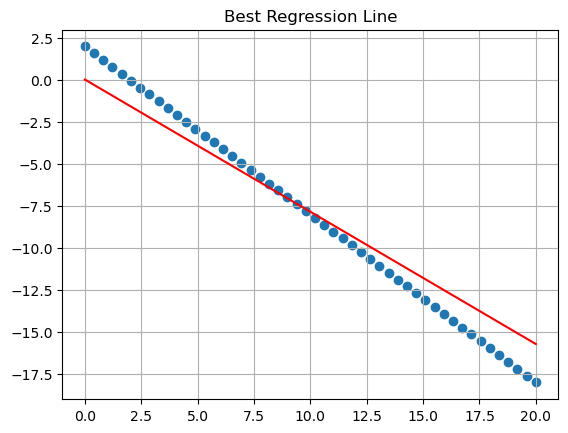

In [13]:
th, cost ,theta0_vec, theta1_vec = LinearRegNAG(X,y,learning_rate=0.0005,max_itration=300,verbose=100,gamma=0.89)

y_predict = predict(X,th)
print('\nThe R-square value : ',r2_score(y,y_predict))

plt.plot(cost,'-o')
plt.xlim(-5,len(cost)+5)
plt.xlabel('epochs')
plt.ylabel('Cost')
plt.grid()

plt.figure()
plt.plot(theta0_vec,cost[:len(theta0_vec)],'-o')
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta0')
plt.ylabel('Cost')
plt.grid()

plt.figure()
plt.plot(theta1_vec,cost[:len(theta1_vec)],'-o')
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta1')
plt.ylabel('Cost')
plt.grid()

plt.figure()
plt.scatter(X,y);
plt.plot(X,y_predict,color='r');
plt.title('Best Regression Line')
plt.grid()